##### Importing required packages

In [193]:
#%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.charts import Bar
from bokeh.io import output_notebook
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates

##### Importing Data

In [194]:
filename = '/Users/GodSpeed/Documents/CodeWork/HR_analytics/HR_comma_sep.csv'
data = pd.read_csv(filename)
data_orig = data
labels = data[['left']]
data = data.drop(['left'],1)
#data = preprocessing.scale(data)
#print max(data['satisfaction_level'])
data_orig.info()
data_orig.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The column sales and salary must be non-numerical as they haven't appeared in the description. Let's see the unique values in them.

In [195]:
unique_sales = data['sales'].unique()
print "unique values in sales: ", unique_sales
unique_salary = data['salary'].unique()
print "unique values in salary: ",unique_salary

unique values in sales:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
unique values in salary:  ['low' 'medium' 'high']


# Visualizing the data

In [196]:
output_notebook()

hist, edges = np.histogram(data['satisfaction_level'], density = False, bins = 'fd')
p1 = figure(title = "Distribution of Satisfaction Level", tools = "")
p1.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649") 
p1.legend.location = "top_left"
p1.xaxis.axis_label = 'Satisfaction Level'
p1.yaxis.axis_label = 'Number of Employees'


hist, edges = np.histogram(data['last_evaluation'], density = False, bins = 'fd')
p2 = figure(title = "Distribution of Last Evaluation", tools = "")
p2.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649")
p2.legend.location = "top_left"
p2.xaxis.axis_label = 'Last Evaluation'
p2.yaxis.axis_label = 'Number of Employees'


p3 = Bar(data['number_project'], 'number_project', 
        values = 'number_project', agg = 'count', 
        title = 'Distribution of Number of Projects', 
        legend = False, tools = '', color = '#4169E1')


hist, edges = np.histogram(data['average_montly_hours'], density = False, bins = 'fd')
p4 = figure(title = "Distribution of Average Monthly Hours", tools = "")
p4.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:],
        fill_color = "#4169E1", line_color = "#033649")
p4.xaxis.axis_label = 'Average Monthly Hours'
p4.yaxis.axis_label = 'Number of Employees'


p5 = Bar(data['time_spend_company'], 'time_spend_company', 
        values = 'time_spend_company', agg = 'count', 
        title = 'Distribution of Time Spent in Company', 
        legend = False, tools = '', color = '#4169E1')


p6 = Bar(data['Work_accident'], 'Work_accident', values = 'Work_accident',
        agg = 'count', title = 'Distribution of Work Accidents', 
        legend = False, tools = '', color = '#4169E1')


p7 = Bar(data['promotion_last_5years'], 'promotion_last_5years', 
        values = 'promotion_last_5years', agg = 'count', 
        title = 'Distribution of Promotion in Last 5 years', 
        legend = False, tools = '', color = '#4169E1')

p8 = Bar(data['sales'], 'sales', values = 'sales', 
         agg = "count", title="Distribution of Job Domain", 
         legend = False, tools = "", color = '#4169E1')


p9 = Bar(data['salary'], 'salary', values = 'salary',
        agg = "count", title = 'Distribution of Salary', 
        legend = False, tools = '', color = '#4169E1')


p10 = Bar(labels, 'left', values = 'left',
        agg = "count", title = 'Distribution of People left', 
        legend = False, tools = '', color = '#4169E1')


show(gridplot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, 
              ncols = 2, plot_width = 400, plot_height = 400))


Loading BokehJS ...

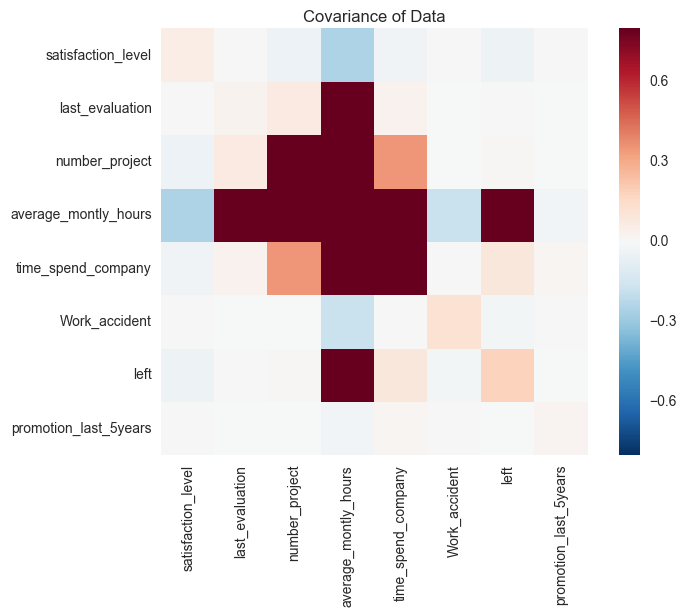

In [197]:
data_covariance = data_orig.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

The variables with high positive covariance are:
    * last_evaluation and average_monthly_hours
    * number_project and average_monthly_hours
    * time_spend_company and average_monthly_hours
    * left and average_monthly_hours
The variables with high negative covariance are:
    * satisfaction_level and average_monthly_hours

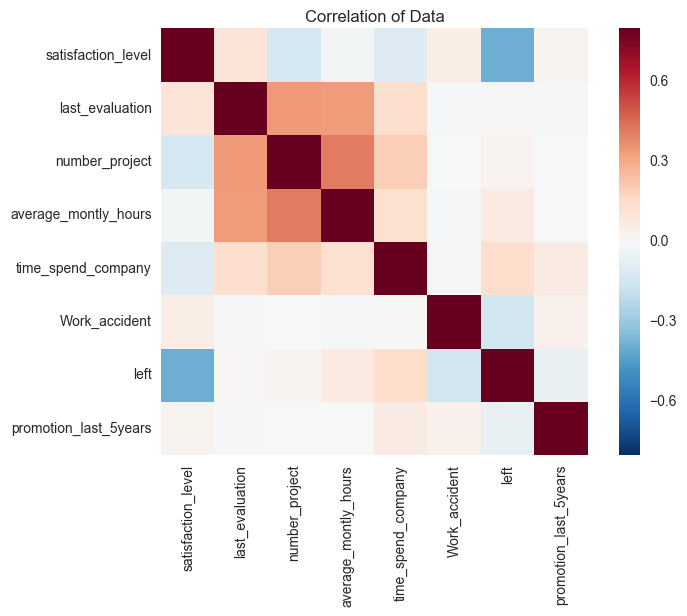

In [198]:
data_corr = data_orig.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

The variable _left_ is highly correlated with **satisfaction_level**.

Assigning numerical values to non-numerical columns _sales_ and _salary_.

In [ ]:
sales_dict = {}
for i in range (len(unique_sales)):
    data_orig['sales'].replace(to_replace = unique_sales[i], 
                               value = i, inplace = True)
    sales_dict[unique_sales[i]] = i

salary_dict = {}
for i in range (len(unique_salary)):
    data_orig['salary'].replace(to_replace = unique_salary[i],
                              value = i, inplace = True)
    salary_dict[unique_salary[i]] = i
print sales_dict
print salary_dict

{'management': 5, 'product_mng': 7, 'hr': 2, 'marketing': 8, 'support': 4, 'sales': 0, 'RandD': 9, 'IT': 6, 'technical': 3, 'accounting': 1}
{'high': 2, 'medium': 1, 'low': 0}


In [ ]:
sns.set(color_codes=True)
var = list(data_orig.columns)
var.remove('left')
#print var
#print type(var)
sns.pairplot(data_orig, hue='left', vars = var, palette="husl")
plt.show()

1. People with __satisfaction level__ from 0.7 to 0.9 with:
    * __last evaluation__ 0.8 or above, or
    * __average monthly hours__ 220 to 280
 have a high tendency to __leave__.
2. People with __satisfaction level__ 0.3 to 0.5 with:
    * __last evaluation__ 0.45 to 0.55, or
    * __average monhtly hours__ 140 to 160
 have a high tendency to __leave__ the job.
3. People from __support__ and __sales__ domain(_sales_) have a higher tendency to __leave__, followed closely by __technical__.
4. Most of the people who have __left__ have __not been promoted__ in last 5 years.
5. People __spending more than 6 hours__ have a very high chances of __staying__ in the job, irrespective of any other factor.
6. Most of the people leaving the company are either satisified at a level of just 0.1 or 0.4.
7. People with a __low to medium salary__ have a higher tendency than those having high salary, to __leave__ the company, __unless they are satisfied to a level of about 1__ or their __last evaluation is less than 0.45__.
8. People with __last evaluation less than or equal to 0.4__ have a very high chance of __staying__ in the job, irrespective of any other factor.
9. People with __last evaluation above 0.75 and average monthly hours above 220__ have a very high chance of __leaving__.
10. Number of projects doesn't play any major role in determining whether a person would leave or not.
11. Work Accidents doesn't play any major role in determining whether a person would leave the company or not.
12. People with __less than 7 hours__ and __more than 125 average monthly hours__ have a high tendency to __leave__ the job.